In [3]:
import spacy as spacy
#check https://towardsdatascience.com/auto-generated-knowledge-graphs-92ca99a81121
from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy
import re
import os.path
my_path = os.path.abspath('')

In [4]:
#read all the text file in the directory
def file_reader(path):
    files = []
    for r,d,f in os.walk(path):
        for file in f:
            if '.txt' in file:
                files.append(os.path.join(r,file))       
    return files

#print elements from list
def print_list(lists):
    for list in lists:
        print(list)

In [5]:

from spacy.pipeline import EntityRuler

nlp = spacy.load('en_core_web_lg')
ruler = EntityRuler(nlp)
pattern_windows = [
    {"label": "PRODUCT", "pattern": [{"TEXT": "Skype"}]},
    {"label": "PRODUCT", "pattern": [{"LOWER": "OneDrive"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "Outlook"}]},
    {"label": "PRODUCT", "pattern": [{"LOWER": "windows"}, {'IS_DIGIT': True, 'OP': '?'}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "Office"}, {'IS_DIGIT': True, 'OP': '?'}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "Xbox"}, {'TEXT': "Live", 'OP': '?'}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "Visual"}, {'TEXT': "Studio"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "Studios"}, {'IS_DIGIT': True, 'OP': '?'}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "Surface"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "Dynamics"}]},
    {"label": "PRODUCT", "pattern": [{"LOWER": "LinkedIn"}]},
    {"label": "PRODUCT", "pattern": [{"LOWER": "Bing"}]},
    {"label": "PRODUCT", "pattern": [{"LOWER": "MSN"}]},
    {"label": "PRODUCT", "pattern": [{"LOWER": "Azure"}]},
    {"label": "PRODUCT", "pattern": [{"LOWER": "Lumia"}]},
    
]
pattern_appl = [
    {"label": "PRODUCT", "pattern": [{"TEXT": "App"},{"IS_PUNCT": True},{"TEXT":"Store"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "iTunes"},{"IS_PUNCT": True},{"TEXT":"Store"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "Apple"},{"IS_PUNCT": True},{"POS":"NOUN"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "Mac"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "iPod"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "iBooks"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "iCloud"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "iPhone"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "watchOS"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "macOS"}]},
    {"label": "PRODUCT", "pattern": [{"TEXT": "iOS"}]},
    {"label": "PRODUCT", "pattern": [{"LOWER": "AirPods"}]}
]
ruler.add_patterns(pattern_appl)
ruler.add_patterns(pattern_windows)

nlp.add_pipe(ruler,before="ner")





In [6]:
files = file_reader(my_path+"/clean_data/item1_business")
files.sort()
print_list(files)
#file = my_path+"/micosoft.txt"





/Users/davidren/Desktop/Education/KTH/2019-2020/2020 Spring/Master Thesis/Data/clean_data/item1_business/filing_0_section_1.txt
/Users/davidren/Desktop/Education/KTH/2019-2020/2020 Spring/Master Thesis/Data/clean_data/item1_business/filing_10_section_0.txt
/Users/davidren/Desktop/Education/KTH/2019-2020/2020 Spring/Master Thesis/Data/clean_data/item1_business/filing_11_section_0.txt
/Users/davidren/Desktop/Education/KTH/2019-2020/2020 Spring/Master Thesis/Data/clean_data/item1_business/filing_13_section_0.txt
/Users/davidren/Desktop/Education/KTH/2019-2020/2020 Spring/Master Thesis/Data/clean_data/item1_business/filing_14_section_0.txt
/Users/davidren/Desktop/Education/KTH/2019-2020/2020 Spring/Master Thesis/Data/clean_data/item1_business/filing_15_section_0.txt
/Users/davidren/Desktop/Education/KTH/2019-2020/2020 Spring/Master Thesis/Data/clean_data/item1_business/filing_16_section_0.txt
/Users/davidren/Desktop/Education/KTH/2019-2020/2020 Spring/Master Thesis/Data/clean_data/item1_bu

In [84]:
text=open(files[5])
#print(text.read())
#if \n Blablab \n if the first character is capitalized, add period
#if \n blablab \n if the first character is not capitalized, remove the first \n

In [85]:

doc = nlp(text.read())
options = {"ents": ["PERSON", "ORG", "PRODUCT"]}
#displacy.render(doc, style="ent", jupyter= True, options=options)

In [86]:
#find competitors
for sent in doc.sents:
    check=0
    relations = list()
    for token in sent:
        if token.lemma_ =="competitor" or token.lemma_ =="compete" or token.lemma_ =="competition":
                #entities_relation.append(token.text)
            if check==0 and len(sent.ents)>1: displacy.render(sent, style="ent", jupyter= True, options=options)
            relations.append(token.text)
            check=check+1
            #displacy.render(sent, style="dep", jupyter= True, options={"distance":140, "collapse_phrases":True})
    if len(relations)>0 and len(sent.ents)>1:print(relations)

['compete']


['Competitors', 'competitors']


['compete']


['compete']


['competes']


['competes']


['competitors']


['competes']


['compete']


['compete']


['compete']


['compete']


['competition']


['competes']


['competition']


['competes']


['competes']


['competitors']


['competition']


['competes']


In [88]:
#find products and services
for sent in doc.sents:
    check=0
    
    relations = list()
    for token in sent:
        
        if token.lemma_ =="product" or token.lemma_ =="service" or token.lemma_ =="sell" or token.lemma_=="device" or token.lemma_=="provide" or token.lemma_=="offer" or token.lemma_=="develop" or token.lemma_=="design" or token.lemma_=="solutions"or token.lemma_ =="manufacture" or token.lemma_ =="tool":
            if check==0 and len(sent.ents)>1: displacy.render(sent, style="ent", jupyter= True, options=options)
            relations.append(token.text)
            check=check+1
            
    if len(relations)>0 and len(sent.ents)>1:print(relations)
        
        
        
#get triples if the sentence do not contain compete and have entities that is not the company

['products']


['develop', 'services', 'devices']


['offer', 'services', 'provide', 'services', 'provide', 'services']


['devices']


['tools', 'services']


['tools']


['services']


['tools']


['service']


['providing', 'designed', 'devices', 'device']


['designs', 'device', 'services']


['devices']


['devices', 'device']


['services']


['develop']


['develop', 'devices']


['product']


['provide']


['product']


['products', 'services', 'services', 'devices']


['product', 'service']


['provide', 'products', 'services', 'products', 'products', 'services']


['product', 'product', 'service']


['devices']


['services', 'offers']


['offering', 'services', 'provide']


['provides']


['providing', 'tools', 'services']


['provide']


['products', 'services']


['products', 'services']


['provide', 'products', 'product']


['services', 'services']


['developing', 'provide', 'products']


['offer']


['products']


['products']


['products', 'provide', 'tools']


['provide', 'services']


['services']


['services']


['devices', 'sell']


['device']


['services']


['sold']


['devices']


['tools', 'services', 'devices']


['design', 'manufacture', 'sell', 'devices', 'devices']


['devices', 'designed', 'products', 'services']


['designed', 'provide', 'devices', 'services']


['service', 'offering', 'providing']


['devices', 'devices']


['designed', 'providing', 'services', 'providing']


['design', 'sell', 'devices', 'devices']


['providing', 'devices', 'services', 'services']


['designed']


['provide']


['products', 'devices']


['products', 'services', 'tools', 'services']


['provide']


['products', 'products']


['devices', 'manufactured']


['develop', 'products', 'services']


['tools', 'services', 'services']


['product', 'devices', 'devices']


['services']


['services', 'sell']


['provide']


['products', 'services']


['developed', 'products', 'services', 'products']


['products', 'services']


['products', 'services']


['product', 'products']


['products', 'services', 'product', 'products', 'services']


['offer']


['tools', 'devices']


['product']


['providing']


['products', 'services']


['products', 'services']


['products', 'services', 'devices', 'sell']


['devices']


['sell', 'devices', 'products', 'services']


['products']


['products', 'services', 'products', 'services']


['sell', 'products', 'services', 'services']


['products', 'services']


['services']


['products']


['devices']


['providing', 'services']


['offer', 'services']


['services']


['service', 'products', 'provide', 'services']


['products']


['products']


In [90]:
#find m&a activities
for sent in doc.sents:
    check=0
    relations = list()
    for token in sent:
        if token.lemma_=="acquisition" or token.lemma_=="acquire" or token.lemma_=="merger" or token.lemma_=="merge" or token.lemma_=="consolidate" or token.lemma_=="consolidation":
            if check==0 and len(sent.ents)>1: displacy.render(sent, style="ent", jupyter= True, options=options)
            relations.append(token.text)
            check=check+1
            
    if len(relations)>0 and len(sent.ents)>1:print(relations)
        
#get triples if there are more than 1 entities and one of the entities is the company, the rest is not the company


['acquire']


['acquire']


In [ ]:
triples=list()

In [94]:
#get competitor triples 
for sent in doc.sents:
    #get relations
    relations = list()
    ents=list()
    head=list()
    tail=list()
    check=True
    has_other_relation=False
    for i, token in enumerate(sent):
        if token.lemma_ =="competitor" or token.lemma_ =="compete" or token.lemma_ =="competition" and len(sent.ents)>1:
            relations.append(token.text)
            if check==True:
                for ent in sent[:i].ents:
                    if ent.label_=='ORG' or ent.label_=='PRODUCT':
                        if ent.text not in head and ent.text not in tail:
                            head.append(ent.text)
                for ent in sent[i:].ents:
                    if ent.label_=='ORG' or ent.label_=='PRODUCT':
                        if ent.text not in tail and ent.text not in head:
                            tail.append(ent.text)
                check= False
                if len(head)==0 and len(tail)>1:
                    head.append(tail[0])
                    tail.pop(0)
                #if len(head)>1 and len(tail)==0:
                    
                    
    #if len(relations)>0 and len(head)>0 and len(tail)>0:

        #print(head )
        #print(relations)
        #print(tail)
        #print()
    #form triples  
    if len(relations)>0 and len(head)>0 and len(tail)>0:
        for h in head:
            for t in tail:
                triples.append([h, relations[0], t])
print(triples)

[['Office', 'Competitors', 'Apple'], ['Office', 'Competitors', 'Cisco Systems'], ['Office', 'Competitors', 'Facebook'], ['Office', 'Competitors', 'Google'], ['Office', 'Competitors', 'IBM'], ['Dynamics', 'competes', 'Infor'], ['Dynamics', 'competes', 'Oracle'], ['Dynamics', 'competes', 'NetSuite'], ['IBM', 'competes', 'Microsoft'], ['Oracle', 'competes', 'Microsoft'], ['Microsoft', 'competitors', 'CA Technologies'], ['Microsoft', 'competitors', 'IBM'], ['Microsoft', 'competitors', 'Oracle'], ['Microsoft', 'competes', 'Apache'], ['Microsoft', 'competes', 'Linux'], ['Microsoft', 'competes', 'PHP'], ['Microsoft', 'compete', 'Java'], ['Microsoft', 'compete', 'IBM'], ['Microsoft', 'compete', 'Oracle'], ['Microsoft', 'compete', 'SAP'], ['Microsoft', 'compete', 'BMC'], ['Microsoft', 'compete', 'CA Technologies'], ['Microsoft', 'compete', 'Hewlett-Packard'], ['Microsoft', 'compete', 'IBM'], ['Microsoft', 'compete', 'VMware'], ['Microsoft', 'compete', 'Adobe'], ['Microsoft', 'compete', 'IBM'], 

In [95]:
#products triples

for sent in doc.sents:
    #get relations
    relations = list()
    ents=list()
    head=list()
    tail=list()
    check=True
    has_other_relation=False
    for token in sent:
        if token.lemma_ =="competitor" or token.lemma_ =="compete" or token.lemma_ =="competition" or token.lemma_=="client" or token.lemma_=="manufacturer" or token.lemma_=="customer" or token.lemma_=="buyer" or token.lemma_=="purchase" or token.lemma_=="acquisition" or token.lemma_=="acquire" or token.lemma_=="merger" or token.lemma_=="merge" or token.lemma_=="consolidate" or token.lemma_=="consolidation":
            has_other_relation=True
    if has_other_relation==False:
        for i, token in enumerate(sent):
            if token.lemma_ =="product" or token.lemma_ =="service" or token.lemma_ =="sell" or token.lemma_=="device" or token.lemma_=="provide" or token.lemma_=="offer" or token.lemma_=="develop" or token.lemma_=="design" or token.lemma_=="solutions"or token.lemma_ =="manufacture" or token.lemma_ =="tool":
                relations.append(token.text)
                if check==True:
                    for ent in sent[:i].ents:
                        if ent.label_=='ORG' or ent.label_=='PRODUCT':
                            if ent.text not in head and ent.text not in tail:
                                head.append(ent.text)
                    for ent in sent[i:].ents:
                        if ent.label_=='ORG' or ent.label_=='PRODUCT':
                            if ent.text not in tail and ent.text not in head:
                                tail.append(ent.text)
                    check= False
                    if len(head)==0 and len(tail)>1:
                        head.append(tail[0])
                        tail.pop(0)
    if len(relations)>0  and len(head)>0 and len(tail)>0:

        #print(head )
        #print(relations)
        #print(tail)
        #print()
        for h in head:
            for t in tail:
                triples.append([h, relations[0], t])
print(triples)


[['Office', 'Competitors', 'Apple'], ['Office', 'Competitors', 'Cisco Systems'], ['Office', 'Competitors', 'Facebook'], ['Office', 'Competitors', 'Google'], ['Office', 'Competitors', 'IBM'], ['Dynamics', 'competes', 'Infor'], ['Dynamics', 'competes', 'Oracle'], ['Dynamics', 'competes', 'NetSuite'], ['IBM', 'competes', 'Microsoft'], ['Oracle', 'competes', 'Microsoft'], ['Microsoft', 'competitors', 'CA Technologies'], ['Microsoft', 'competitors', 'IBM'], ['Microsoft', 'competitors', 'Oracle'], ['Microsoft', 'competes', 'Apache'], ['Microsoft', 'competes', 'Linux'], ['Microsoft', 'competes', 'PHP'], ['Microsoft', 'compete', 'Java'], ['Microsoft', 'compete', 'IBM'], ['Microsoft', 'compete', 'Oracle'], ['Microsoft', 'compete', 'SAP'], ['Microsoft', 'compete', 'BMC'], ['Microsoft', 'compete', 'CA Technologies'], ['Microsoft', 'compete', 'Hewlett-Packard'], ['Microsoft', 'compete', 'IBM'], ['Microsoft', 'compete', 'VMware'], ['Microsoft', 'compete', 'Adobe'], ['Microsoft', 'compete', 'IBM'], 

In [96]:
#products triples

for sent in doc.sents:
    #get relations
    relations = list()
    ents=list()
    head=list()
    tail=list()
    check=True
    has_other_relation=False

    for i, token in enumerate(sent):
        if token.lemma_=="acquisition" or token.lemma_=="acquire" or token.lemma_=="merger" or token.lemma_=="merge" or token.lemma_=="consolidate" or token.lemma_=="consolidation":
            relations.append(token.text)
            if check==True:
                for ent in sent[:i].ents:
                    if ent.label_=='ORG' or ent.label_=='PRODUCT' or ent.label_=='PERSON':
                        if ent.text not in head and ent.text not in tail:
                            head.append(ent.text)
                for ent in sent[i:].ents:
                    if ent.label_=='ORG' or ent.label_=='PRODUCT':
                        if ent.text not in tail and ent.text not in head:
                            tail.append(ent.text)
                check= False
                if len(head)==0 and len(tail)>1:
                    head.append(tail[0])
                    tail.pop(0)
    if len(relations)>0  and len(head)>0 and len(tail)>0:

        #print(head )
        #print(relations)
        #print(tail)
        #print()
        for h in head:
            for t in tail:
                triples.append([h, relations[0], t])
print(triples)


[['Office', 'Competitors', 'Apple'], ['Office', 'Competitors', 'Cisco Systems'], ['Office', 'Competitors', 'Facebook'], ['Office', 'Competitors', 'Google'], ['Office', 'Competitors', 'IBM'], ['Dynamics', 'competes', 'Infor'], ['Dynamics', 'competes', 'Oracle'], ['Dynamics', 'competes', 'NetSuite'], ['IBM', 'competes', 'Microsoft'], ['Oracle', 'competes', 'Microsoft'], ['Microsoft', 'competitors', 'CA Technologies'], ['Microsoft', 'competitors', 'IBM'], ['Microsoft', 'competitors', 'Oracle'], ['Microsoft', 'competes', 'Apache'], ['Microsoft', 'competes', 'Linux'], ['Microsoft', 'competes', 'PHP'], ['Microsoft', 'compete', 'Java'], ['Microsoft', 'compete', 'IBM'], ['Microsoft', 'compete', 'Oracle'], ['Microsoft', 'compete', 'SAP'], ['Microsoft', 'compete', 'BMC'], ['Microsoft', 'compete', 'CA Technologies'], ['Microsoft', 'compete', 'Hewlett-Packard'], ['Microsoft', 'compete', 'IBM'], ['Microsoft', 'compete', 'VMware'], ['Microsoft', 'compete', 'Adobe'], ['Microsoft', 'compete', 'IBM'], 

In [97]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_kg(pairs):
    k_graph = nx.from_pandas_edgelist(pairs, 'subject', 'object',
            create_using=nx.MultiDiGraph())
    node_deg = nx.degree(k_graph)
    layout = nx.spring_layout(k_graph, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(120, 90), dpi=80)
    nx.draw_networkx(
        k_graph,
        node_size=[int(deg[1]) * 500 for deg in node_deg],
        arrowsize=20,
        linewidths=1.5,
        pos=layout,
        edge_color='red',
        edgecolors='black',
        node_color='white',
        )
    labels = dict(zip(list(zip(pairs.subject, pairs.object)),
                  pairs['relation'].tolist()))
    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,
                                 font_color='red')
    plt.axis('off')
    plt.show()
    

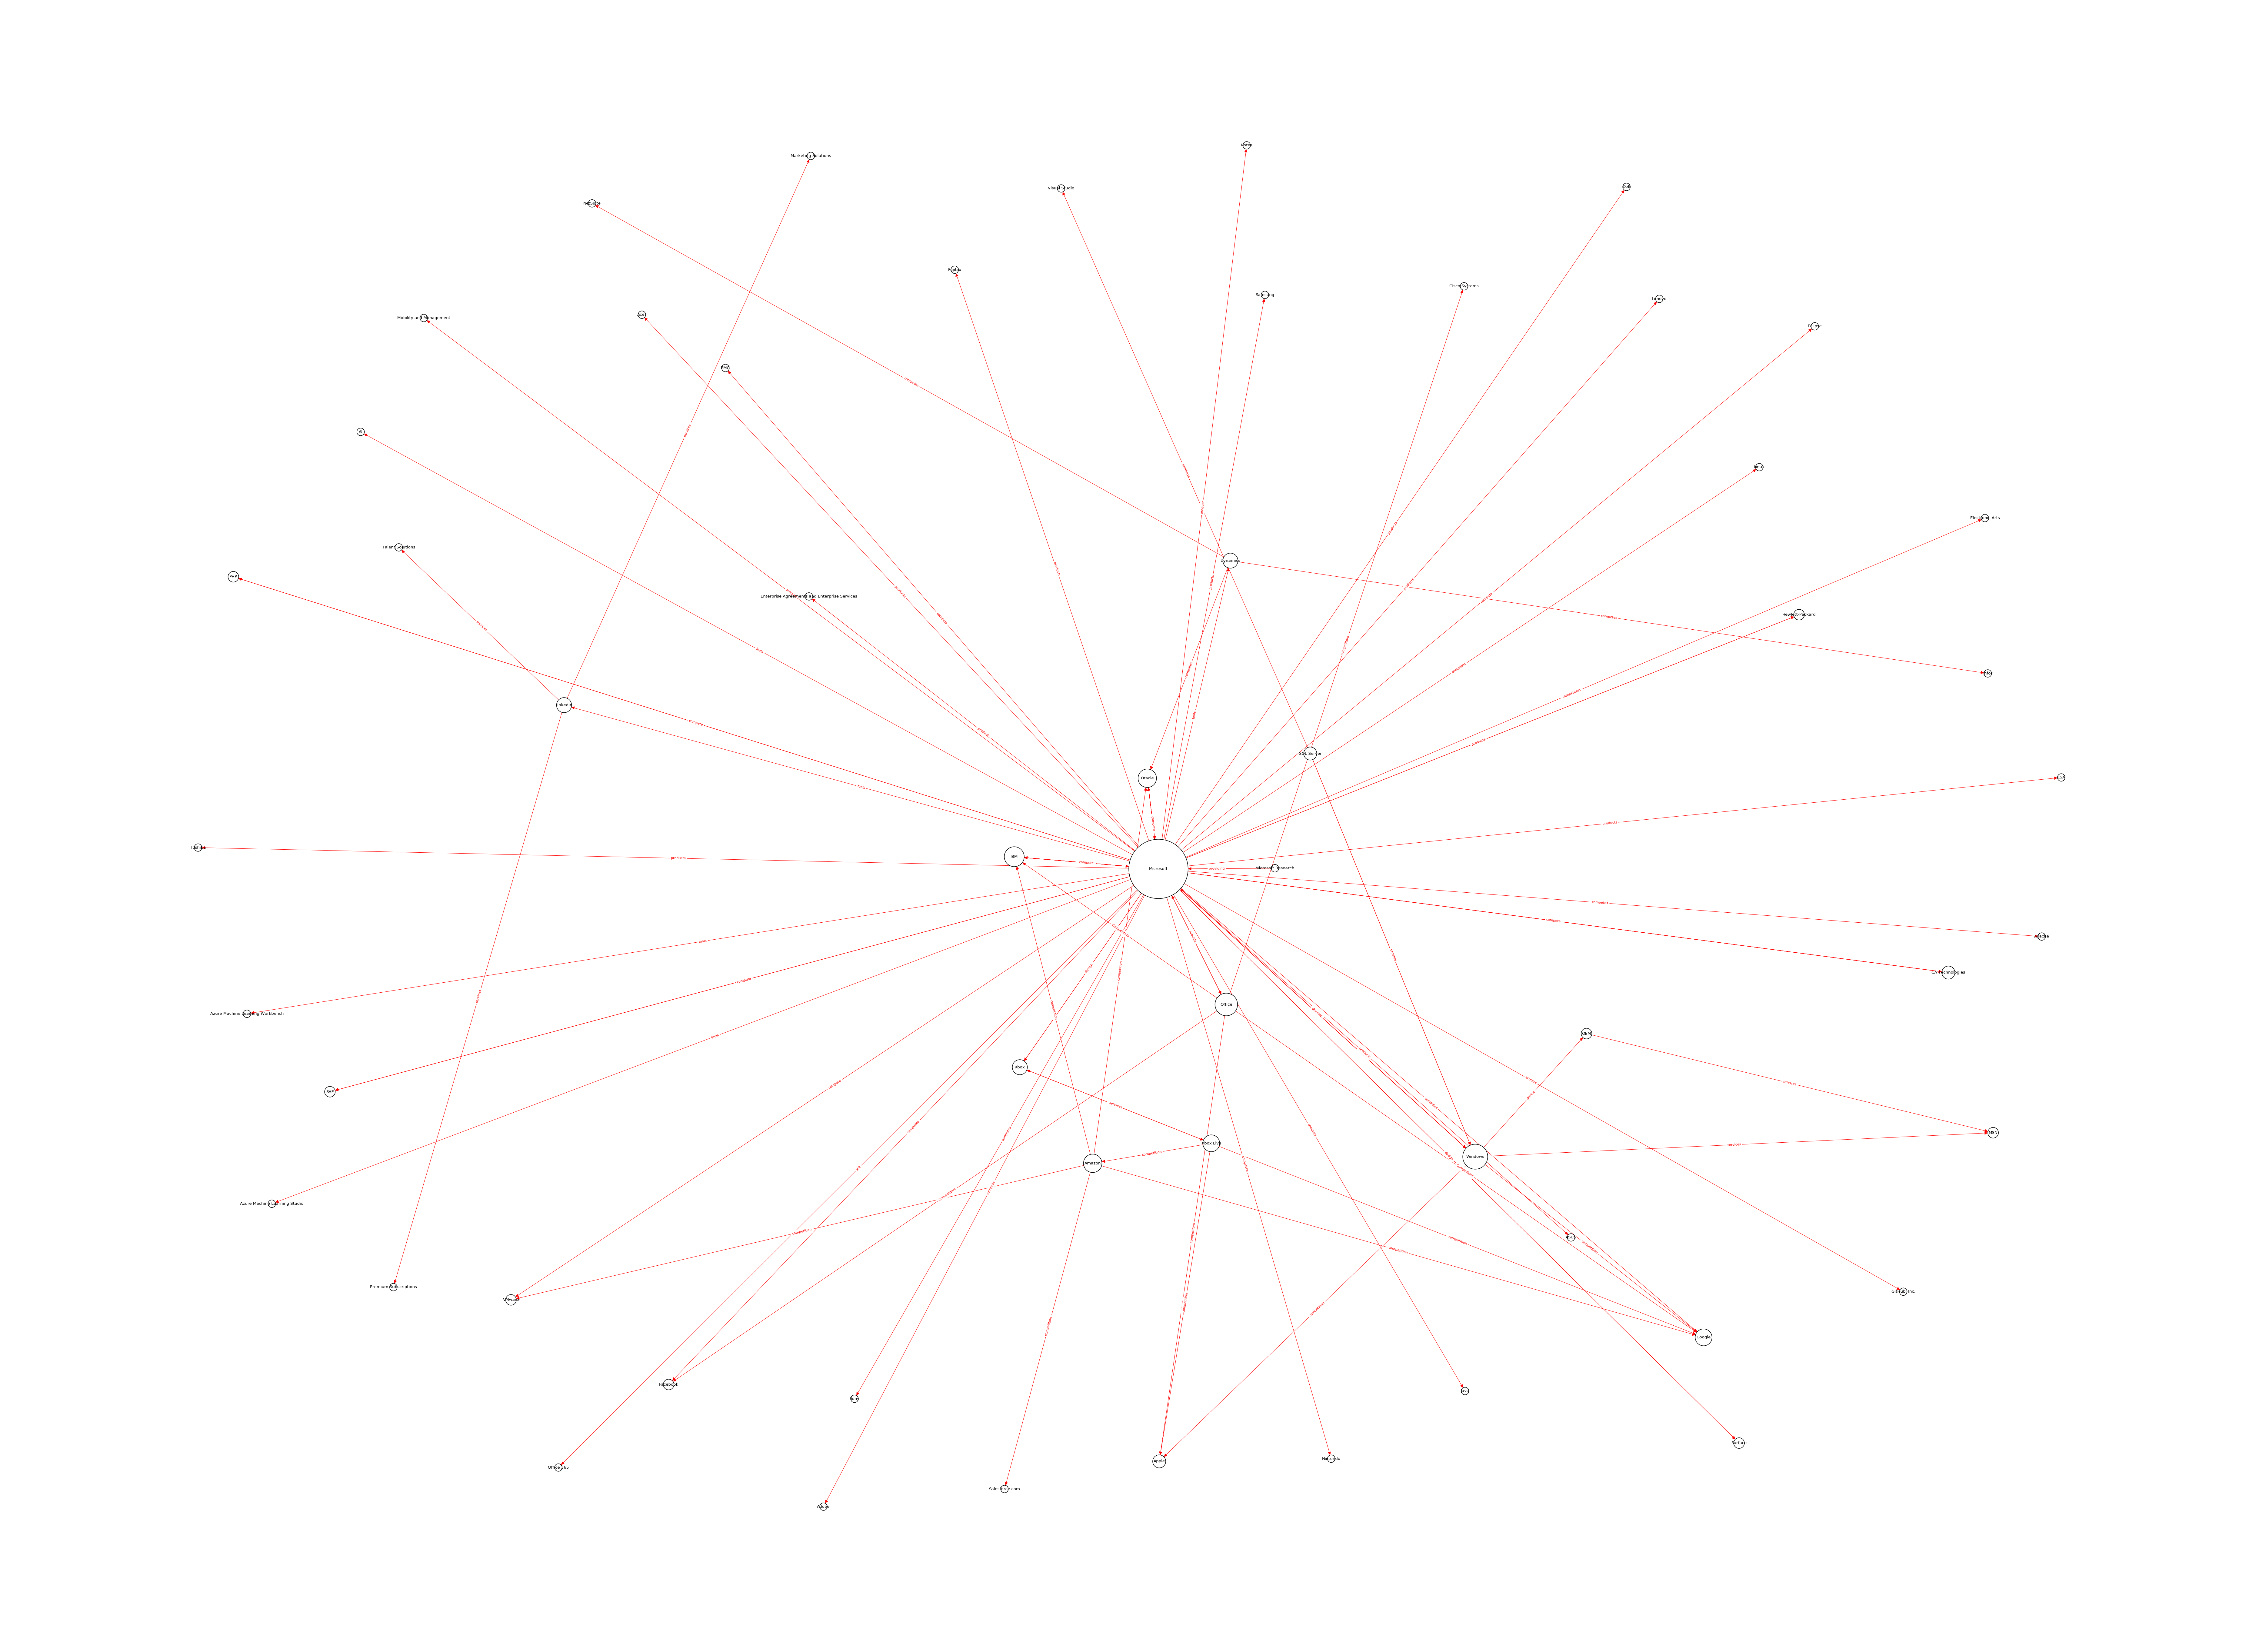

In [99]:
import pandas as pd
pairs = pd.DataFrame(triples, columns=['subject',
                         'relation', 'object'])
draw_kg(pairs)

In [ ]:
from spacy.matcher import Matcher
#train NER model

#create training data
matcher = Matcher(nlp.vocab)
pattern_windows = [
    {[{"LOWER": "Skype"}]},
    {[{"LOWER": "OneDrive"}]},
    {[{"TEXT": "Outlook"}]},
    {[{"LOWER": "windows"}, {'IS_DIGIT': True, 'OP': '?'}]},
    {[{"LOWER": "Office"}, {'IS_DIGIT': True, 'OP': '?'}]},
    {[{"LOWER": "Xbox"}, {'TEXT': "Live", 'OP': '?'}]},
    {{"TEXT": "Visual"}, {'TEXT': "Studio"}]},
    {[{"TEXT": "Studios"}, {'IS_DIGIT': True, 'OP': '?'}]},
    {[{"LOWER": "Xbox"}, {'TEXT': "Live", 'OP': '?'}]},
    {[{"TEXT": "Surface"}]},
    {[{"TEXT": "Dynamics"}]},
    {[{"LOWER": "LinkedIn"}]},
]
pattern_appl = [
    {[{"TEXT": "App"},{"TEXT":"Store"}]},
    {[{"LOWER": "iTunes"},{"TEXT":"Store"}]},
    {[{"TEXT": "Apple"},{"POS":"NOUN"}]},
    {[{"LOWER": "Mac"}]},
    {[{"LOWER": "iPod"}]},
    {[{"LOWER": "iBooks"}]},
    {[{"LOWER": "iCloud"}]},
    {[{"LOWER": "iPhone"}]},
    {[{"LOWER": "watchOS"}]},
    {[{"LOWER": "macOS"}]},
    {[{"LOWER": "iOS"}]},
]
TRAINING_DATA = []

# Create a Doc object for each text in TEXTS
for sent in nlp.pipe(doc):
    # Match on the doc and create a list of matched spans
    spans = [sent[start:end] for match_id, start, end in matcher(sent)]
    # Get (start character, end character, label) tuples of matches
    entities = [(span.start_char, span.end_char, "PRODUCT") for span in spans]
    # Format the matches as a (doc.text, entities) tuple
    training_example = (sent.text, {"entities": entities})
    # Append the example to the training data
    TRAINING_DATA.append(training_example)

print(*TRAINING_DATA, sep="\n")


#train the model https://spacy.io/usage/training#ner

In [ ]:
"""
# Patterns are lists of dictionaries describing the tokens


#use matcher to get entities
matcher.add("PRODUCT", None, pattern_windows, pattern_appl)
def extra_ent_component(doc):
    # Create an entity Span with the label "GPE" for all matches
    matches = matcher(doc)
    doc.ents = [Span(doc, start, end, label="PRODUCT") for match_id, start, end in matches]
    return doc

#print entities NER
entity_pairs = []
for sent in doc.sents:
    if sent.ents and (e.label_=="ORG" or e.label_=="PERSON" or e.label_=="PRODUCT" for e in doc.ents):
        #entity_pairs.append([sent.ents[0],sent.ents[1]])
        print(sent)
        print(sent.ents)
        #print("["+sent.ents[0].text+", "+sent.root.text+", "+sent.ents[1].text+"]" )
        print()
    #if ent.label_=='ORG' or ent.label_=='PRODUCT' or ent.label_=='PERSON':
        #print(ent.text, ent.start_char, ent.end_char, ent.label_)

#get verbs from every sentences dep_ as relations
entities_relation = []
for sent in doc.sents:
        for token in sent:
            if token.pos_=="VERB" or token.pos_=="AUX":
                #entities_relation.append(token.text)
                print(sent)
                print("["+token.text+"]")
                print()
"""


In [104]:
#try to find sector
for sent in doc.sents:
    check=0
    relations = list()
    for token in sent:
        if token.lemma_ =="industry" or token.lemma_ =="sector" or token.lemma_ =="leader" or token.lemma_ =="lead":
            if check==0 : displacy.render(sent, style="ent", jupyter= True, options=options)
            relations.append(token.text)
            check=check+1
    if len(relations)>0:print(relations)
            #displacy.render(sent, style="dep", jupyter= True, options={"distance":140, "collapse_phrases":True})

['lead']


['industry', 'leading']


['leaders']


['lead', 'industry']


['leader']


['lead']


['leader']


['industry']


['industry']


['sector']


['sector']


In [102]:
#find customer
for sent in doc.sents:
    check=0
    relations = list()
    for token in sent:
        if  token.lemma_=="client" or token.lemma_=="manufacturer" or token.lemma_=="customer" or token.lemma_=="buyer" or token.lemma_=="purchase":
            if check==0 and len(sent.ents)>1: displacy.render(sent, style="ent", jupyter= True, options=options)
            relations.append(token.text)
            check=check+1
    if len(relations)>0 and len(sent.ents)>1:print(relations)

['customers']


['customers']


['customers']


['customers', 'customers']


['customers']


['manufacturer']


['customer']


['customers']


['customers']


['customers']


['manufacturers']


['client']


['customers']


['purchased']


['customers']


['customer']


['customers']


['manufacturers']


['customers']


['manufacturers']


['manufacturers']


['purchase']


['customers']


['customers']


['manufacturers']


['customers']


['customers']


['customers', 'purchase']


['customers']


['customers']


['customers']


['customers', 'purchase']


['customers']


['purchase']


['customers']


['customer']


['customer']


['purchase', 'customers']
